In [20]:
import pandas as pd
import numpy as np
import helper
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
main_frame = pd.read_csv('cleaned_data/long_interpolated_target.csv', index_col=0, parse_dates=['Time'])

In [3]:
## 
# main_frame['Time'] = pd.to_datetime(main_frame['Time'])
# main_frame.head()

In [4]:
weather_frame = pd.read_csv('cleaned_data/weather.csv', index_col=0, parse_dates=['date_time'])
weather_frame.rename(columns={"date_time":"Time", "zip":"zip_code"}, inplace=True)

In [5]:
econ_frame = pd.read_csv('cleaned_data/key_econ.csv', index_col=1, parse_dates= {'Time':['Month', 'Year']})

In [6]:
# polling_frame = pd.read_csv('cleaned_data/poll_clean.csv', index_col=0, parse_dates=['date'])
# polling_frame = polling_frame.rename(columns={"zip_codes":"zip_code", "date":"Time"})


In [7]:
new_biz_frame = pd.read_csv('cleaned_data/new_biz_taxpayer.csv', index_col=1, parse_dates= {'Time':['month', 'year']})

In [30]:
main_frame.columns

Index(['Time', 'zip_code', 'zori_ssa', 'Consumer Confidence Index TX',
       'Consumer Confidence West South Central',
       'Consumer Confidence Index US', 'Consumer Price Index TX',
       'Consumer Price Index U.S.', 'Nonfarm Employment TX',
       'Nonfarm Employment U.S.', 'Unemployment TX', 'Unemployment U.S.',
       'Single Family Building Permits TX', 'Multi Family Building Permits TX',
       'Existing Single Family Home Sales TX',
       'Existing Single Family Home Price TX',
       'Non Residential Building Construction',
       'Total Sales Tax Collections Retail TX',
       'Total Sales Tax Collections TX', 'Retail Gasoline Price TX',
       'Retail Diesel Price TX', 'Nonfarm Employment Illinois',
       'Nonfarm Employment Florida', 'Nonfarm Employment New York',
       'Nonfarm Employment Texas', 'Nonfarm Employment California',
       'Gross Value Crude Oil Production',
       'Gross Value Natural Gas Production', 'Motor Fuel Taxed Gasoline',
       'Motor Fuel Taxe

In [ ]:
lag_ = {12:'zori_ssa'}

In [8]:
main_frame = helper.time_lag_merge(main_frame, main_frame, lag_)
main_frame = helper.time_lag_merge(main_frame, econ_frame)
main_frame = helper.time_lag_merge(main_frame, weather_frame)
main_frame = helper.time_lag_merge(main_frame, new_biz_frame)

<AxesSubplot:>

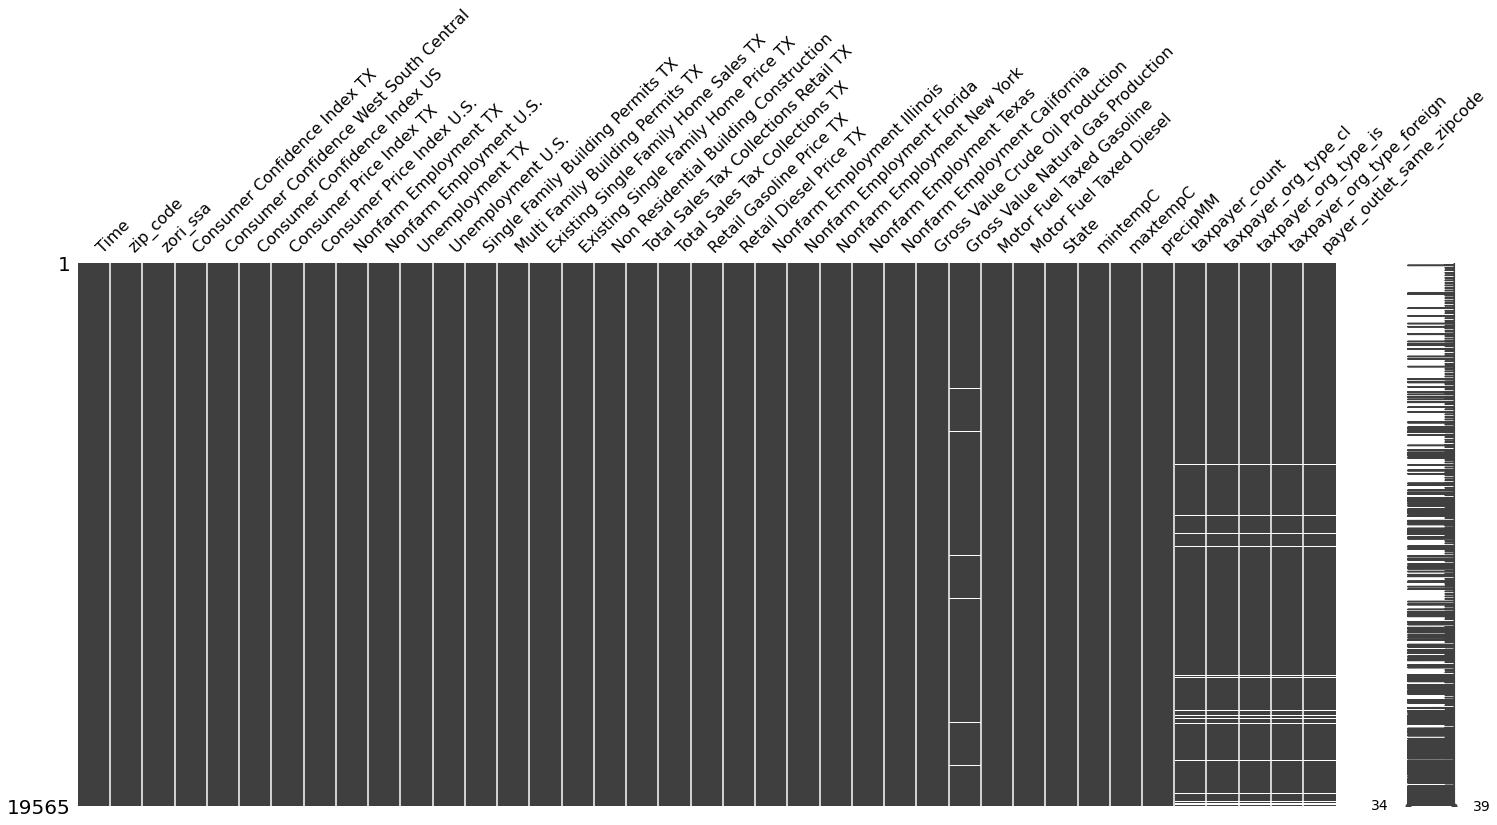

In [11]:
msno.matrix(main_frame)

In [15]:
main_frame = main_frame.fillna(0)

In [23]:
main_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19565 entries, 0 to 19564
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Time                                    19565 non-null  datetime64[ns]
 1   zip_code                                19565 non-null  int64         
 2   zori_ssa                                19565 non-null  float64       
 3   Consumer Confidence Index TX            19565 non-null  float64       
 4   Consumer Confidence West South Central  19565 non-null  float64       
 5   Consumer Confidence Index US            19565 non-null  float64       
 6   Consumer Price Index TX                 19565 non-null  float64       
 7   Consumer Price Index U.S.               19565 non-null  float64       
 8   Nonfarm Employment TX                   19565 non-null  float64       
 9   Nonfarm Employment U.S.                 19565 non-

In [27]:
y = main_frame['zori_ssa']
X = main_frame.drop(['Time', 'zori_ssa', 'zip_code', 'State'], axis=1)

In [28]:
lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
lm.fit(X_train, y_train)
print(f'train_score: {lm.score(X_train, y_train)}')
print(f'test_score: {lm.score(X_test, y_test)}')

train_score: 0.19311969332867462
test_score: 0.17417088674476344
